**IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***IMPORTING THE DATASET ***

In [2]:
file_id = '19omKVCJ1sEvlw1ZmSpyNi-SZS2YZuHme'
file_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(file_url)

In [3]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects


FEW NECCESARY CODES

In [4]:
# Use the drop_duplicates method to remove duplicate rows
data = data.drop_duplicates()

In [5]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME'], axis = 1)

**PRE PROCESSING**

In [6]:
#HANDLING MISSING VALUES

In [8]:
print("Percentage of missing values in each column:")
print(100 * data.isnull().sum() / len(data))

Percentage of missing values in each column:
GENDER          0.000000
DRUG NAME       0.000000
AGE             0.005023
RACE            0.000000
SIDE EFFECTS    0.000000
dtype: float64


In [9]:
data

# Calculate the median age (excluding missing values)
median_age = data['AGE'].median()

# Fill missing values in the 'AGE' column with the calculated median age
data['AGE'].fillna(median_age, inplace=True)


In [10]:
data.isna().sum()

GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

In [11]:
#FINDING OUTLIERS AND HANDLING THEM

Text(0.5, 1.0, 'Boxplot for AGE')

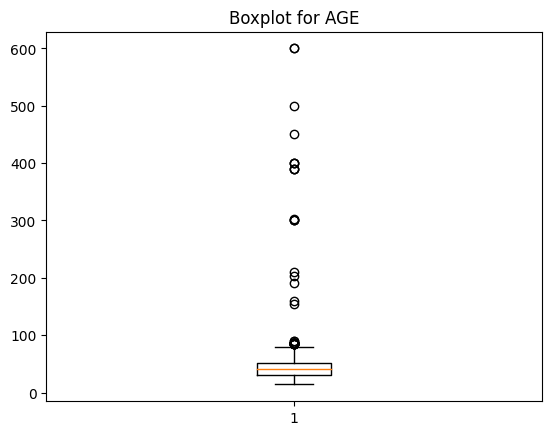

In [12]:
plt.boxplot(data['AGE'])
plt.title('Boxplot for AGE')

In [13]:
q1 = np.percentile(data['AGE'], 25)
q2 = np.percentile(data['AGE'], 50)
q3 = np.percentile(data['AGE'], 75)

In [14]:
iqr=q3-q1

In [15]:
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [16]:
low_limit

1.0

In [17]:
upr_limit

81.0

In [18]:
outlier=[]
for x in data['AGE']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [19]:
outlier

[300.0,
 302.0,
 87.0,
 90.0,
 84.0,
 500.0,
 400.0,
 87.0,
 203.0,
 160.0,
 400.0,
 87.0,
 87.0,
 191.0,
 450.0,
 390.0,
 84.0,
 87.0,
 84.0,
 155.0,
 300.0,
 87.0,
 87.0,
 84.0,
 390.0,
 87.0,
 84.0,
 600.0,
 84.0,
 84.0,
 87.0,
 84.0,
 211.0,
 600.0,
 401.0,
 89.0,
 300.0,
 390.0]

In [20]:
ind1 = data['AGE']>upr_limit
ind2= data['AGE']<low_limit

In [21]:
data.loc[ind1].index

Int64Index([  3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820],
           dtype='int64')

In [23]:
data.loc[ind2].index #no low outliers

Int64Index([], dtype='int64')

In [24]:
data[ind1]['AGE']

3008      300.0
41048     302.0
43016      87.0
52650      90.0
60136      84.0
66169     500.0
85047     400.0
93226      87.0
111850    203.0
119574    160.0
127240    400.0
145846     87.0
168426     87.0
171643    191.0
174039    450.0
174487    390.0
186893     84.0
209780     87.0
218988     84.0
224733    155.0
232518    300.0
242302     87.0
245321     87.0
259034     84.0
264849    390.0
266215     87.0
275520     84.0
290165    600.0
295943     84.0
300452     84.0
315506     87.0
325628     84.0
325631    211.0
333669    600.0
337790    401.0
363934     89.0
384352    300.0
393820    390.0
Name: AGE, dtype: float64

In [25]:
data=data[data['AGE']<=100]

In [26]:
data['AGE'].value_counts()

55.0    15493
37.0    14307
29.0    13671
24.0    13640
41.0    12945
        ...  
84.0        8
90.0        1
80.0        1
77.0        1
89.0        1
Name: AGE, Length: 67, dtype: int64

In [27]:
#Encoding

In [28]:
# As the dataset is large, I am considering Label encoding

In [29]:
#LABEL ENCODING

In [30]:
label_columns = ['GENDER','RACE','DRUG NAME','SIDE EFFECTS']

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in label_columns:
    data[column] = le.fit_transform(data[column])

<ipython-input-31-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-31-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
<ipython-input-31-a4480c16519a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [32]:
data['DRUG NAME']

0         435
1         491
2         425
3         470
4         439
         ... 
399995    231
399996    227
399997     90
399998    493
399999    353
Name: DRUG NAME, Length: 398189, dtype: int64

**CORRELATION**

<function matplotlib.pyplot.show(close=None, block=None)>

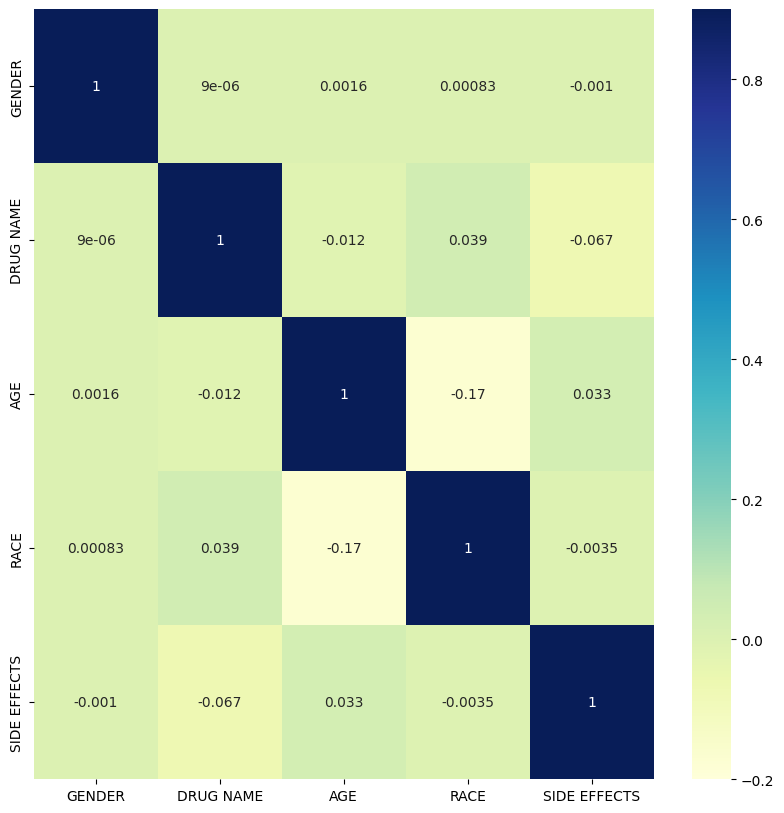

In [33]:
plt.figure(figsize=(10,10))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show

In [34]:
# No correlation between any features. So I am not dropping anything.

**Scaling**

In [35]:
# I am not doing scaling because scaling has to be done on continuous numerical columns. But in my dataset all are discrete.

**Train Test Splitting**

In [36]:
X=data.drop('SIDE EFFECTS',axis=1)
y=data['SIDE EFFECTS']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (298641, 4)
y_train dataset:  (298641,)
X_test dataset:  (99548, 4)
y_test dataset:  (99548,)


**Model Selection Based on Metrics**

In [39]:
# I am Considering models which are not affected by the magnitude difference in each features.

In [40]:
data['SIDE EFFECTS'].value_counts()# multiclass classification

1    132665
3    115245
2     74162
4     53187
0     22930
Name: SIDE EFFECTS, dtype: int64

In [41]:
data['SIDE EFFECTS'].value_counts(normalize=True)

1    0.333171
3    0.289423
2    0.186248
4    0.133572
0    0.057586
Name: SIDE EFFECTS, dtype: float64

In [42]:
# It is an imbalanced dataset, so I am considering other metrics rather than accuracy

In [43]:
# DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred=dt_clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.9863985213163499
Precision =  0.9864405884238486
Recall =  0.9863985213163499
F1 Score =  0.9863622857744598


In [47]:
# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=rf_clf.predict(X_test)

In [50]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.9857455699762928
Precision =  0.9857855016126708
Recall =  0.9857455699762928
F1 Score =  0.9857073408640687


In [51]:
# GBM

In [52]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting classifier
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
gbm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm_clf.predict(X_test)

In [53]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.80629445091815
Precision =  0.8162833796216451
Recall =  0.80629445091815
F1 Score =  0.8052327338130272


In [54]:
#Naive bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the Naive Bayes classifier to the training data
nb_clf.fit(X_train, y_train)

# Predict using the Naive Bayes classifier
y_pred = nb_clf.predict(X_test)
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average='weighted'))
print('Recall = ',recall_score(y_test,y_pred,average='weighted'))
print('F1 Score = ',f1_score(y_test,y_pred,average='weighted'))

Accuracy =  0.34171454976493754
Precision =  0.26595736489947286
Recall =  0.34171454976493754
F1 Score =  0.2821504728244714


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#DECSION TREE IS THE BEST MODEL ON THE BASIS OF METRICS OTHER THAN ACCURACY

### ***CROSS VALIDATION ***

In [57]:
from sklearn.model_selection import StratifiedKFold
# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store precision, recall, and F1 scores for each fold
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Fit the classifier on the training data
    dt_classifier.fit(X_train_cv, y_train_cv)

    # Predict on the test data
    y_pred_cv = dt_classifier.predict(X_test_cv)

    # Calculate precision, recall, and F1 scores
    precision = precision_score(y_test_cv, y_pred_cv,average='weighted')
    recall = recall_score(y_test_cv, y_pred_cv,average='weighted')
    f1 = f1_score(y_test_cv, y_pred_cv,average='weighted')

    precision_scores_dt.append(precision)
    recall_scores_dt.append(recall)
    f1_scores_dt.append(f1)

# Calculate and print the mean precision, recall, and F1 scores across all folds
mean_precision = sum(precision_scores_dt) / len(precision_scores_dt)
mean_recall = sum(recall_scores_dt) / len(recall_scores_dt)
mean_f1 = sum(f1_scores_dt) / len(f1_scores_dt)

print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)

Mean Precision: 0.9863593616546146
Mean Recall: 0.986323077582729
Mean F1 Score: 0.9863195530972095


HYPERPARAMETER TUNING

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2','auto'],
    'random_state': [None, 42],
}

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
cv_model_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_params,
                                 scoring='f1_weighted', n_jobs=-1, return_train_score=True,
                                 cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Fit the randomized search to your training data
cv_model_dt.fit(X_train_cv, y_train_cv)

# Get the best hyperparameters for Decision Tree
best_params_dt = cv_model_dt.best_params_

# Print the best parameters
print("Best Parameters for Decision Tree (F1 Weighted Score):", best_params_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Best Parameters for Decision Tree (F1 Weighted Score): {'splitter': 'best', 'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'criterion': 'gini'}


In [59]:
# Use the best hyperparameters obtained from RandomizedSearchCV
best_params_dt = {
    'splitter': 'random',
    'random_state': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': None,
    'max_depth': 50,
    'criterion': 'entropy'
}

# Create a new Decision Tree classifier with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt)

# Fit the model to your training data
best_dt_model.fit(X_train_cv, y_train_cv)

# Predict on the test data
y_pred_dt = best_dt_model.predict(X_test_cv)

# Calculate precision, recall, and F1-score
precision_dt = precision_score(y_test_cv, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_cv, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_cv, y_pred_dt, average='weighted')

# Print the evaluation metrics
print("Precision (Decision Tree):", precision_dt)
print("Recall (Decision Tree):", recall_dt)
print("F1 Score (Decision Tree):", f1_dt)


Precision (Decision Tree): 0.9856804704759909
Recall (Decision Tree): 0.9856473749638986
F1 Score (Decision Tree): 0.9856498762024832
